In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 


os.chdir(r"C:\Users\mese4\Documents\The Data incubator\project\cord-19_2020-07-01\2020-07-01")
df=pd.read_csv('metadata.csv', encoding='ISO-8859-1')


C:\Users\mese4\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1]:
import spacy
nlp = spacy.load("en_core_sci_md")
doc = nlp("Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals.")

In [3]:
#Get drug names database

df_drugs=pd.read_csv(r"C:\Users\mese4\Documents\The Data incubator\project\Drugmap\drugbank vocabulary.csv", encoding='ISO-8859-1')
df_drugs.head()

df_drugs

,DrugBank ID,Accession Numbers,Common name,CAS,UNII,Synonyms,Standard InChI Key
0,DB00001,BIOD00024 | BTD00024,Lepirudin,138068-37-8,Y43GF64R34,Hirudin variant-1 | Lepirudin recombinant,NaN
1,DB00002,BIOD00071 | BTD00071,Cetuximab,205923-56-4,PQX0D8J21J,Cetuximab | CÃ©tuximab | Cetuximabum,NaN
2,DB00003,BIOD00001 | BTD00001,Dornase alfa,143831-71-4,953A26OA1Y,Deoxyribonuclease (human clone 18-1 protein mo...,NaN
3,DB00004,BIOD00084 | BTD00084,Denileukin diftitox,173146-27-5,25E79B5CTM,Denileukin | Interleukin-2/diptheria toxin fus...,NaN
4,DB00005,BIOD00052 | BTD00052,Etanercept,185243-69-0,OP401G7OJC,Etanercept | etanercept-szzs | etanercept-ykro...,NaN
...,...,...,...,...,...,...,...
13575,DB15689,NaN,Azoximer bromide,892497-01-7,90G53638ZD,"Poly((1-(carboxymethyl)piperazin-1-ium-1,4-diy...",NaN
13576,DB15690,NaN,Fluoroestradiol F-18,94153-53-4,T32277KB09,(18F)FES | 16-alpha-(18-Fluoro)-17betaestradio...,KDLLNMRYZGUVMA-ZYMZXAKXSA-N
13577,DB15691,NaN,Anti-SARS-CoV-2 REGN-COV2,NaN,NaN,REGN10933+REGN10987 combination therapy,NaN
13578,DB15692,NaN,COVID-19 convalescent plasma,NaN,YM6LN8TU2V,Convalescent plasma (COVID-19),NaN


In [4]:
alias=df_drugs[df_drugs['Synonyms'].notnull()]

alias=alias['Synonyms']

alias=alias.tolist()


def aliases_lst(df_alias_lst):
    
    alias_lst=[]
    for x in alias:
        gn=x.split('|')
        alias_lst.append(gn)
    
    flat_list = []
    for sublist in alias_lst:
        for item in sublist:
            item=item.lower()
            flat_list.append(item)
    return flat_list

lst_alias_drugs=aliases_lst(alias) 

symbol=df_drugs['Common name']
symbol=symbol.tolist()
drug_check=symbol+lst_alias_drugs
drug_check
drug_check_lower=aliases_lst(drug_check)
drug_check_lower

['hirudin variant-1 ',
 ' lepirudin recombinant',
 'cetuximab ',
 ' cã©tuximab ',
 ' cetuximabum',
 'deoxyribonuclease (human clone 18-1 protein moiety) ',
 ' dornasa alfa ',
 ' dornase alfa, recombinant ',
 ' dornase alpha ',
 ' recombinant deoxyribonuclease (dnase)',
 'denileukin ',
 ' interleukin-2/diptheria toxin fusion protein',
 'etanercept ',
 ' etanercept-szzs ',
 ' etanercept-ykro ',
 ' recombinant human tnf ',
 ' rhu tnfr:fc ',
 ' rhu-tnfr:fc ',
 ' tnfr-immunoadhesin',
 'bivalirudin ',
 ' bivalirudina ',
 ' bivalirudinum',
 'leuprorelin ',
 ' leuprorelina ',
 ' leuproreline ',
 ' leuprorelinum',
 'peg-ifn alfa-2a ',
 ' peg-interferon alfa-2a ',
 ' peginterferon alfa-2a ',
 ' pegylated interfeaon alfa-2a ',
 ' pegylated interferon alfa-2a ',
 ' pegylated interferon alpha-2a ',
 ' pegylated-interferon alfa 2a',
 'alteplasa ',
 ' alteplase (genetical recombination) ',
 ' alteplase, recombinant ',
 ' alteplase,recombinant ',
 ' plasminogen activator (human tissue-type protein moi

In [5]:
df_genes=pd.read_csv(r"C:\Users\mese4\Documents\The Data incubator\project\genes_dataset\G-SynMiner_miner-geneHUGO.tsv",sep='\t')
#df_genes=df_genes.set_index('symbol')
df_genes


C:\Users\mese4\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (32,34,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,# ensembl_gene_id,hgnc_id,symbol,name,locus_group,locus_type,status,location,location_sortable,alias_symbol,...,horde_id,merops,imgt,iuphar,kznf_gene_catalog,mamit-trnadb,cd,lncrnadb,enzyme_id,intermediate_filament_db
0,ENSG00000121410,HGNC:5,A1BG,alpha-1-B glycoprotein,protein-coding gene,gene with protein product,Approved,19q13.43,19q13.43,NaN,...,NaN,I43.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000268895,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,19q13.43,19q13.43,FLJ23569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000148584,HGNC:24086,A1CF,APOBEC1 complementation factor,protein-coding gene,gene with protein product,Approved,10q21.1,10q21.1,ACF|ASP|ACF64|ACF65|APOBEC1CF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSG00000175899,HGNC:7,A2M,alpha-2-macroglobulin,protein-coding gene,gene with protein product,Approved,12p13.31,12p13.31,FWP007|S863-7|CPAMD5,...,NaN,I39.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENSG00000245105,HGNC:27057,A2M-AS1,A2M antisense RNA 1 (head to head),non-coding RNA,"RNA, long non-coding",Approved,12p13.31,12p13.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35649,ENSG00000162378,HGNC:25820,ZYG11B,"zyg-11 family member B, cell cycle regulator",protein-coding gene,gene with protein product,Approved,1p32.3,01p32.3,FLJ13456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35650,ENSG00000159840,HGNC:13200,ZYX,zyxin,protein-coding gene,gene with protein product,Approved,7q32,07q32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35651,ENSG00000274572,HGNC:51695,ZYXP1,zyxin pseudogene 1,pseudogene,pseudogene,Approved,8q24.23,08q24.23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35652,ENSG00000074755,HGNC:29027,ZZEF1,zinc finger ZZ-type and EF-hand domain contain...,protein-coding gene,gene with protein product,Approved,17p13.3,17p13.3,KIAA0399|ZZZ4|FLJ10821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
alias=df_genes[df_genes['alias_symbol'].notnull()]

alias=alias['alias_symbol']

alias=alias.tolist()


def aliases_lst(df_alias_lst):
    
    alias_lst=[]
    for x in alias:
        gn=x.split('|')
        alias_lst.append(gn)
    
    flat_list = []
    for sublist in alias_lst:
        for item in sublist:
            item=item.lower()
            flat_list.append(item)
    return flat_list

lst_alias_gns=aliases_lst(alias) 

symbol=df_genes['symbol']
symbol=symbol.tolist()
gene_check=symbol+lst_alias_gns
gene_check
gene_check_lower=aliases_lst(gene_check)

In [10]:
#gene_check_lower

In [7]:
rule = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')



In [8]:

df1=df['source_x']
def preprint(a):

    if 'BioRxiv' in a :
        return 'Preprint'
    elif 'MedRxiv' in a:
        return 'Preprint'
    elif 'ArXiv' in a:
        return 'Preprint'
    else:
        return 'Peer-Review'
    
a=[preprint(n) for n in df1]

df_abs = pd.DataFrame(a,columns =['preprint'])  
df_abs
df['preprint']=df_abs
df_19=df[(df['publish_time'] > '2019-12-01')]

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df_19['year'] = df['publish_time'].dt.year
df_19['month'] = df['publish_time'].dt.month

df_19 ['year_month']= df_19['year'].map(str) + '-' + df_19['month'].map(str)

df_19.head()

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,preprint,year,month,year_month
4231,4tt0vnr4,aa3858e3cf21baa00c6f60272e4b59d3490129e0,PMC,CXCR6 regulates localization of tissue-residen...,10.1084/jem.20181308,PMC6888981,3.15586e+07,cc-by-nc-sa,Resident memory T cells (T(RM) cells) are an i...,2019-12-02,...,NaN,NaN,document_parses/pdf_json/aa3858e3cf21baa00c6f6...,document_parses/pmc_json/PMC6888981.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4234,9c0zrp7p,23d0641f1f78528bbf3fa7b0b749abc1299a9cb4,PMC,Local risk perception enhances epidemic control,10.1371/journal.pone.0225576,PMC6890219,3.17946e+07,cc-by,"As infectious disease outbreaks emerge, public...",2019-12-03,...,NaN,NaN,document_parses/pdf_json/23d0641f1f78528bbf3fa...,document_parses/pmc_json/PMC6890219.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4236,iaktm72a,9be8c80283a7fed59057d7788eb2850708f45450,PMC,Curcumin to Promote the Synthesis of Silver NP...,10.1038/s41598-019-54752-4,PMC6890765,3.17969e+07,cc-by,This work presents a simple one-pot protocol t...,2019-12-03,...,NaN,NaN,document_parses/pdf_json/9be8c80283a7fed59057d...,document_parses/pmc_json/PMC6890765.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4237,gcmpatlb,d5d29d1d48e1a4fe8f39d38639766c86dc976e5e,PMC,Factors that enable effective One Health colla...,10.1371/journal.pone.0224660,PMC6892547,3.18006e+07,cc-by,Advocates for a One Health approach recognize ...,2019-12-04,...,NaN,NaN,document_parses/pdf_json/d5d29d1d48e1a4fe8f39d...,document_parses/pmc_json/PMC6892547.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4246,k2monfg0,772046ceb62525b9f5c685e2d2b8dd33573107ba,PMC,Risk factors for the development of acute resp...,10.1186/s13054-019-2646-8,PMC6898929,3.18105e+07,cc-by,BACKGROUND: Clinical and epidemiological diffe...,2019-12-06,...,NaN,NaN,document_parses/pdf_json/772046ceb62525b9f5c68...,document_parses/pmc_json/PMC6898929.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0


In [ ]:
df_19

In [ ]:
sns.set_context("talk")
sns.set_style('darkgrid')

g = sns.catplot(x="year_month", hue="preprint", 

                data=df_19, kind="count",

                height=5, aspect=5)

g.savefig("publications_years.png")

In [9]:


##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [10]:

nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
#new_words = ["using", "show", 'covid','patient','disease','patients','treatment','viral','data','including','coronavirus','health','study',"result",'unknown','2555','method','infection','day','case','however','moreover','conclusion','virus','patient', "large", "also", "iv", "one",'nan', "two", "new", "previously", "shown",'recently','promising']
#stop_words = stop_words.union(new_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mese4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
len(df_19['abstract'])
dataset=df_19

In [27]:


#text = dataset['abstract'].translate(string.maketrans(“”,””), string.punctuation)
import string
#dataset['abstract_']=dataset['abstract'].str.replace('[{}]'.format(string.punctuation), '')
dataset['abstract_'] = dataset['abstract'].astype(str)
corpus = []
for i in range(0, len(dataset['abstract_'])):
    #Remove punctuations
    text = dataset['abstract_'].iloc[i]
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
   # text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split() 
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

#len(corpus)

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
corpus[1050]
dataset['corpus']=corpus

dataset.tail()



C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,pdf_json_files,pmc_json_files,url,s2_id,preprint,year,month,year_month,abstract_,corpus
169811,7dqr5adm,NaN,Medline; WHO,A cohort of patients with COVID-19 in a major ...,10.3390/jcm9061733,NaN,3.25127e+07,unk,Background: Since the confirmation of the firs...,2020,...,NaN,NaN,https://doi.org/10.3390/jcm9061733; https://ww...,219553115.0,Peer-Review,2020.0,1.0,2020.0-1.0,Background: Since the confirmation of the firs...,background: since confirmation first patient i...
169813,ajqbljai,76ca0fe38a7e8bc1b730be50658fa9cb2eb7e4f2; e33a...,Medline; PMC,Epidemiology of Covid-19 in a Long-Term Care F...,10.1056/nejmoa2005412,PMC7121761,3.22202e+07,no-cc,BACKGROUND: Long-term care facilities are high...,2020-03-27,...,document_parses/pdf_json/76ca0fe38a7e8bc1b730b...,document_parses/pmc_json/PMC7121761.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32220208/;...,214683161.0,Peer-Review,2020.0,3.0,2020.0-3.0,BACKGROUND: Long-term care facilities are high...,background: long-term care facility high-risk ...
169814,gsktliyd,24741265a77032e848afe0cd1745adda124818be,Elsevier; Medline; PMC,A SARS-CoV-2 familial cluster infection reveal...,10.1016/j.jiph.2020.05.018,PMC7250748,3.25055e+07,no-cc,Information on SARS-CoV-2 asymptomatic infecti...,2020-05-27,...,document_parses/pdf_json/24741265a77032e848afe...,document_parses/pmc_json/PMC7250748.xml.json,https://www.sciencedirect.com/science/article/...,218891131.0,Peer-Review,2020.0,5.0,2020.0-5.0,Information on SARS-CoV-2 asymptomatic infecti...,information sars-cov-2 asymptomatic infection ...
169817,9svgq9f1,75a2fe5ad9b6eb8caf30399b9440f7dd610a32d3; 4461...,Medline; PMC,Virusâvirus interactions impact the populati...,10.1073/pnas.1911083116,PMC6936719,3.18439e+07,cc-by,The human respiratory tract hosts a diverse co...,2019-12-26,...,document_parses/pdf_json/75a2fe5ad9b6eb8caf303...,document_parses/pmc_json/PMC6936719.xml.json,https://doi.org/10.1073/pnas.1911083116; https...,209388856.0,Peer-Review,2019.0,12.0,2019.0-12.0,The human respiratory tract hosts a diverse co...,human respiratory tract host diverse community...
169818,ch8hpw62,a1bc169fd52d551ae00c757983678495780e820c,Medline; PMC,Common breaches in biosafety during donning an...,10.1007/s12630-020-01648-x,PMC7155949,3.22916e+07,no-cc,NaN,2020-04-14,...,document_parses/pdf_json/a1bc169fd52d551ae00c7...,document_parses/pmc_json/PMC7155949.xml.json,https://doi.org/10.1007/s12630-020-01648-x; ht...,215760581.0,Peer-Review,2020.0,4.0,2020.0-4.0,nan,nan


In [132]:
from sklearn.feature_extraction.text import CountVectorizer

import re

cv=CountVectorizer(max_df=0.9,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(genes_found)

#list(cv.vocabulary_.keys())[:10]

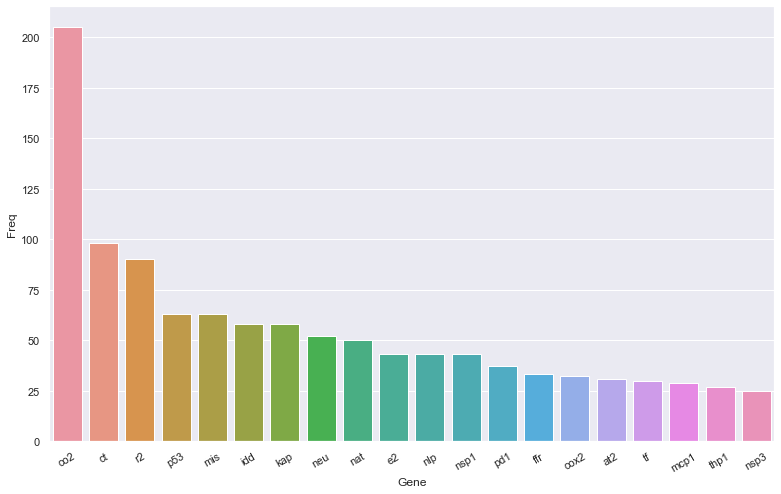

In [135]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(genes_found, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Gene", "Freq"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Gene", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

g.figure.savefig('most_frqu_gene.png')

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
h.figure.savefig('most_two_frqu.png')


In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
j.figure.savefig('most_three_frqu.png')


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[1]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

NameError: name 'X' is not defined

In [14]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

NameError: name 'tf_idf_vector' is not defined

In [ ]:
import sys
!{sys.executable} -m pip install wordcloud

In [ ]:
df = pd.DataFrame(gene_names)
df

In [16]:
import pyensembl
ensembl = pyensembl.EnsemblRelease(99)
ensembl
#import sys
#!{sys.executable} -m pip install pyensembl

#!pyensembl install --release 75 99 --species human


gene_names = ensembl.gene_names(contig=None, strand=None)#(contig=6, position=29945884)


gene_names
genes_low=[]

for gene in gene_names:
    l=gene.lower()
    genes_low.append(l)
    
genes_low

['a1bg',
 'a1bg-as1',
 'a1cf',
 'a2m',
 'a2m-as1',
 'a2ml1',
 'a2ml1-as1',
 'a2ml1-as2',
 'a2mp1',
 'a3galt2',
 'a4galt',
 'a4gnt',
 'aaas',
 'aacs',
 'aacsp1',
 'aadac',
 'aadacl2',
 'aadacl2-as1',
 'aadacl3',
 'aadacl4',
 'aadacp1',
 'aadat',
 'aagab',
 'aak1',
 'aamdc',
 'aamp',
 'aanat',
 'aar2',
 'aard',
 'aars1',
 'aars1p1',
 'aars2',
 'aarsd1',
 'aasdh',
 'aasdhppt',
 'aass',
 'aatbc',
 'aatf',
 'aatk',
 'abalon',
 'abat',
 'abba01000933.1',
 'abba01000935.2',
 'abba01006766.1',
 'abba01010928.1',
 'abba01031658.1',
 'abba01031669.1',
 'abba01037345.1',
 'abba01037348.1',
 'abba01045074.1',
 'abba01045074.2',
 'abca1',
 'abca10',
 'abca11p',
 'abca12',
 'abca13',
 'abca17p',
 'abca2',
 'abca3',
 'abca4',
 'abca5',
 'abca6',
 'abca7',
 'abca8',
 'abca9',
 'abca9-as1',
 'abcb1',
 'abcb10',
 'abcb10p1',
 'abcb10p3',
 'abcb10p4',
 'abcb11',
 'abcb4',
 'abcb5',
 'abcb6',
 'abcb7',
 'abcb8',
 'abcb9',
 'abcc1',
 'abcc10',
 'abcc11',
 'abcc12',
 'abcc13',
 'abcc2',
 'abcc3',
 'abcc4',


In [17]:
gene_names
genes_low=[]

for gene in gene_names:
    l=gene.lower()
    print(l)
    genes_low.append(l)
    



a1bg
a1bg-as1
a1cf
a2m
a2m-as1
a2ml1
a2ml1-as1
a2ml1-as2
a2mp1
a3galt2
a4galt
a4gnt
aaas
aacs
aacsp1
aadac
aadacl2
aadacl2-as1
aadacl3
aadacl4
aadacp1
aadat
aagab
aak1
aamdc
aamp
aanat
aar2
aard
aars1
aars1p1
aars2
aarsd1
aasdh
aasdhppt
aass
aatbc
aatf
aatk
abalon
abat
abba01000933.1
abba01000935.2
abba01006766.1
abba01010928.1
abba01031658.1
abba01031669.1
abba01037345.1
abba01037348.1
abba01045074.1
abba01045074.2
abca1
abca10
abca11p
abca12
abca13
abca17p
abca2
abca3
abca4
abca5
abca6
abca7
abca8
abca9
abca9-as1
abcb1
abcb10
abcb10p1
abcb10p3
abcb10p4
abcb11
abcb4
abcb5
abcb6
abcb7
abcb8
abcb9
abcc1
abcc10
abcc11
abcc12
abcc13
abcc2
abcc3
abcc4
abcc5
abcc5-as1
abcc6
abcc6p1
abcc6p2
abcc8
abcc9
abcd1
abcd1p2
abcd1p3
abcd1p4
abcd1p5
abcd2
abcd3
abcd4
abce1
abcf1
abcf2
abcf2p1
abcf2p2
abcf3
abcg1
abcg2
abcg4
abcg5
abcg8
abhd1
abhd10
abhd11
abhd11-as1
abhd12
abhd12b
abhd13
abhd14a
abhd14a-acy1
abhd14b
abhd15
abhd15-as1
abhd16a
abhd16b
abhd17a
abhd17ap1
abhd17ap3
abhd17ap4
abhd17ap5
abhd

ac007684.2
ac007685.1
ac007685.2
ac007686.1
ac007686.2
ac007686.3
ac007686.4
ac007686.5
ac007687.1
ac007688.1
ac007688.2
ac007688.3
ac007690.1
ac007695.1
ac007718.1
ac007728.1
ac007728.2
ac007728.3
ac007731.1
ac007731.2
ac007731.3
ac007731.4
ac007731.5
ac007731.6
ac007736.1
ac007738.1
ac007741.1
ac007742.1
ac007742.2
ac007743.1
ac007744.1
ac007749.1
ac007749.2
ac007750.1
ac007751.1
ac007773.1
ac007780.1
ac007785.1
ac007785.2
ac007785.3
ac007786.1
ac007786.2
ac007786.3
ac007786.4
ac007787.1
ac007787.2
ac007790.1
ac007792.1
ac007795.1
ac007823.1
ac007834.1
ac007834.2
ac007842.1
ac007846.1
ac007846.2
ac007848.1
ac007848.2
ac007849.1
ac007849.2
ac007861.1
ac007861.2
ac007876.1
ac007877.1
ac007878.1
ac007879.1
ac007879.2
ac007879.3
ac007879.4
ac007879.5
ac007880.1
ac007880.2
ac007881.1
ac007881.2
ac007881.3
ac007881.4
ac007899.1
ac007906.1
ac007906.2
ac007907.1
ac007908.1
ac007919.1
ac007919.2
ac007920.1
ac007920.2
ac007922.1
ac007922.2
ac007922.3
ac007922.4
ac007922.5
ac007923.1
ac007923.2

ac012568.1
ac012569.1
ac012572.1
ac012572.3
ac012574.1
ac012574.2
ac012588.1
ac012588.2
ac012593.1
ac012593.2
ac012603.1
ac012613.1
ac012613.2
ac012615.1
ac012615.2
ac012615.3
ac012615.4
ac012615.5
ac012615.6
ac012616.1
ac012618.1
ac012618.2
ac012618.3
ac012625.1
ac012629.1
ac012629.2
ac012629.3
ac012629.4
ac012636.1
ac012640.1
ac012640.2
ac012640.3
ac012640.4
ac012640.5
ac012640.6
ac012640.7
ac012645.1
ac012645.2
ac012645.3
ac012645.4
ac012651.1
ac012653.1
ac012653.2
ac012668.1
ac012668.2
ac012668.3
ac012669.1
ac012671.1
ac012671.2
ac012673.1
ac012676.1
ac012676.2
ac012676.3
ac012676.4
ac012676.5
ac013244.1
ac013244.2
ac013244.3
ac013248.1
ac013262.1
ac013265.1
ac013267.1
ac013267.2
ac013267.3
ac013267.4
ac013268.1
ac013268.2
ac013268.3
ac013268.4
ac013268.5
ac013269.1
ac013269.2
ac013269.3
ac013270.1
ac013271.1
ac013275.1
ac013277.1
ac013286.1
ac013287.1
ac013290.1
ac013355.1
ac013356.1
ac013356.2
ac013356.3
ac013356.4
ac013391.1
ac013391.2
ac013391.3
ac013394.1
ac013399.1
ac013400.1

ac026347.2
ac026348.1
ac026353.1
ac026355.1
ac026355.2
ac026355.3
ac026355.4
ac026356.1
ac026356.2
ac026358.1
ac026362.1
ac026362.2
ac026367.1
ac026367.2
ac026367.3
ac026368.1
ac026369.1
ac026369.2
ac026369.3
ac026371.1
ac026391.1
ac026396.1
ac026401.1
ac026401.2
ac026401.3
ac026402.1
ac026402.2
ac026403.1
ac026407.1
ac026408.1
ac026410.1
ac026410.2
ac026410.3
ac026410.4
ac026412.1
ac026412.2
ac026412.3
ac026412.4
ac026414.1
ac026415.1
ac026421.1
ac026422.1
ac026427.1
ac026427.2
ac026433.1
ac026434.1
ac026436.1
ac026444.1
ac026458.1
ac026458.2
ac026461.1
ac026461.2
ac026461.3
ac026461.4
ac026462.1
ac026462.2
ac026462.3
ac026462.4
ac026462.5
ac026464.1
ac026464.2
ac026464.3
ac026464.4
ac026464.5
ac026464.6
ac026468.1
ac026469.1
ac026470.1
ac026470.2
ac026470.3
ac026470.4
ac026471.1
ac026471.2
ac026471.3
ac026471.4
ac026471.5
ac026471.6
ac026474.1
ac026477.1
ac026495.1
ac026495.2
ac026523.1
ac026523.2
ac026523.3
ac026523.4
ac026583.1
ac026585.1
ac026616.1
ac026620.1
ac026620.2
ac026624.1

ac084876.2
ac084877.1
ac084878.1
ac084879.1
ac084879.2
ac084879.3
ac084880.1
ac084880.2
ac084880.3
ac084880.4
ac084882.1
ac087045.1
ac087045.2
ac087045.3
ac087071.1
ac087071.2
ac087072.1
ac087072.2
ac087073.1
ac087163.1
ac087163.2
ac087163.3
ac087164.1
ac087164.2
ac087175.1
ac087190.1
ac087190.2
ac087190.3
ac087203.1
ac087203.2
ac087203.3
ac087222.1
ac087235.1
ac087235.2
ac087239.1
ac087241.1
ac087241.2
ac087242.1
ac087245.1
ac087257.1
ac087257.2
ac087258.1
ac087260.1
ac087269.1
ac087269.2
ac087269.3
ac087272.1
ac087273.1
ac087273.2
ac087276.1
ac087276.2
ac087276.3
ac087276.4
ac087277.1
ac087277.2
ac087280.1
ac087280.2
ac087283.1
ac087283.2
ac087284.1
ac087284.2
ac087286.1
ac087286.2
ac087286.3
ac087286.4
ac087289.1
ac087289.2
ac087289.3
ac087289.4
ac087289.5
ac087292.1
ac087292.2
ac087294.1
ac087301.1
ac087311.1
ac087311.2
ac087312.1
ac087318.1
ac087321.1
ac087341.1
ac087343.1
ac087354.1
ac087359.1
ac087360.1
ac087362.1
ac087362.2
ac087369.1
ac087369.2
ac087373.1
ac087379.1
ac087379.2

ac099482.2
ac099487.1
ac099487.2
ac099489.1
ac099489.2
ac099489.3
ac099494.1
ac099494.2
ac099494.3
ac099499.1
ac099499.2
ac099501.1
ac099506.1
ac099506.2
ac099506.3
ac099508.1
ac099508.2
ac099509.1
ac099509.2
ac099511.1
ac099513.1
ac099517.1
ac099518.1
ac099518.2
ac099518.3
ac099518.4
ac099518.5
ac099518.6
ac099520.1
ac099520.2
ac099521.1
ac099521.2
ac099521.3
ac099521.4
ac099522.1
ac099522.2
ac099524.1
ac099535.1
ac099535.2
ac099537.1
ac099541.1
ac099541.2
ac099542.1
ac099542.2
ac099548.1
ac099548.2
ac099550.1
ac099552.1
ac099552.2
ac099552.3
ac099552.4
ac099552.5
ac099554.1
ac099560.1
ac099560.2
ac099563.1
ac099563.2
ac099565.1
ac099567.1
ac099568.1
ac099568.2
ac099570.1
ac099570.2
ac099570.3
ac099654.1
ac099654.10
ac099654.11
ac099654.12
ac099654.13
ac099654.14
ac099654.15
ac099654.16
ac099654.2
ac099654.3
ac099654.4
ac099654.5
ac099654.6
ac099654.7
ac099654.8
ac099654.9
ac099661.1
ac099667.1
ac099668.1
ac099669.1
ac099670.1
ac099670.2
ac099670.3
ac099671.1
ac099677.1
ac099677.2
ac0

ac121338.2
ac121342.1
ac121343.1
ac121493.1
ac121757.1
ac121757.2
ac121758.1
ac121758.2
ac121758.3
ac121758.4
ac121761.1
ac121761.2
ac121764.1
ac121764.2
ac121764.3
ac122108.1
ac122108.2
ac122108.3
ac122129.1
ac122129.2
ac122133.1
ac122134.1
ac122136.1
ac122138.1
ac122179.1
ac122683.1
ac122685.1
ac122688.1
ac122688.2
ac122688.3
ac122688.4
ac122688.5
ac122694.1
ac122697.1
ac122707.1
ac122710.1
ac122710.2
ac122713.1
ac122713.2
ac122714.1
ac122714.2
ac122718.1
ac122718.2
ac122719.1
ac122719.2
ac122719.3
ac123023.1
ac123023.2
ac123512.1
ac123567.1
ac123567.2
ac123595.1
ac123595.2
ac123595.3
ac123767.1
ac123768.1
ac123768.2
ac123768.3
ac123768.4
ac123768.5
ac123769.1
ac123777.1
ac123784.1
ac123786.1
ac123786.2
ac123786.3
ac123788.1
ac123788.2
ac123900.1
ac123904.1
ac123904.2
ac123904.3
ac123905.1
ac123912.1
ac123912.2
ac123912.3
ac123912.4
ac123912.5
ac123912.6
ac124014.1
ac124016.1
ac124016.2
ac124016.3
ac124017.1
ac124045.1
ac124057.1
ac124066.1
ac124067.1
ac124067.2
ac124067.3
ac124067.4

adcy10p1
adcy2
adcy3
adcy4
adcy5
adcy6
adcy6-dt
adcy7
adcy8
adcy9
adcyap1
adcyap1r1
add1
add2
add3
add3-as1
adgb
adgra1
adgra1-as1
adgra2
adgra3
adgrb1
adgrb2
adgrb3
adgrd1
adgrd1-as1
adgrd2
adgre1
adgre2
adgre3
adgre4p
adgre5
adgrf1
adgrf2
adgrf3
adgrf4
adgrf5
adgrf5-as1
adgrf5p1
adgrf5p2
adgrg1
adgrg2
adgrg3
adgrg4
adgrg5
adgrg6
adgrg7
adgrl1
adgrl2
adgrl3
adgrl3-as1
adgrl4
adgrv1
adh1a
adh1b
adh1c
adh4
adh5
adh5p2
adh5p3
adh5p4
adh6
adh7
adhfe1
adi1
adi1p1
adi1p2
adi1p3
adig
adipoq
adipoq-as1
adipor1
adipor1p1
adipor1p2
adipor2
adirf
adirf-as1
adk
adm
adm2
adm5
adnp
adnp-as1
adnp2
ado
adora1
adora2a
adora2a-as1
adora2b
adora2bp1
adora3
adpgk
adpgk-as1
adprh
adprhl1
adprhl2
adprm
adra1a
adra1b
adra1d
adra2a
adra2b
adra2c
adrb1
adrb2
adrb3
adrm1
adsl
adss1
adss2
adtrp
aebp1
aebp2
aen
af001548.1
af001548.2
af001548.3
af001550.1
af001550.2
af003529.1
af013593.1
af013593.2
af015262.1
af015720.1
af038458.1
af038458.2
af038458.3
af064858.1
af064858.2
af064858.3
af064860.1
af064860.2
af0648

al136524.1
al136526.1
al136528.1
al136528.2
al136528.3
al136531.1
al136531.2
al136531.3
al136537.1
al136960.1
al136961.1
al136962.1
al136964.1
al136967.1
al136967.2
al136968.1
al136968.2
al136972.1
al136979.1
al136980.1
al136981.1
al136981.2
al136981.3
al136981.4
al136982.1
al136982.2
al136982.3
al136982.4
al136982.5
al136982.6
al136982.7
al136984.1
al136985.1
al136985.2
al136985.3
al136987.1
al136988.1
al136988.2
al137000.1
al137001.1
al137001.2
al137002.1
al137002.2
al137003.1
al137005.1
al137009.1
al137009.2
al137013.1
al137014.1
al137017.1
al137018.1
al137022.1
al137024.1
al137025.1
al137026.1
al137026.2
al137026.3
al137027.1
al137028.1
al137028.2
al137058.1
al137058.2
al137058.3
al137060.1
al137060.2
al137060.3
al137060.4
al137060.5
al137060.6
al137060.7
al137060.8
al137060.9
al137067.1
al137067.2
al137067.3
al137071.1
al137072.1
al137073.1
al137074.1
al137076.1
al137077.1
al137077.2
al137078.1
al137078.2
al137100.1
al137100.2
al137100.3
al137127.1
al137129.1
al137139.1
al137139.2

al365181.4
al365184.1
al365184.2
al365203.1
al365203.2
al365204.1
al365204.2
al365204.3
al365205.1
al365205.2
al365205.3
al365205.4
al365209.1
al365214.1
al365214.2
al365214.3
al365215.1
al365215.2
al365217.1
al365219.1
al365220.1
al365222.1
al365223.1
al365223.2
al365226.1
al365229.1
al365232.1
al365255.1
al365256.1
al365258.1
al365258.2
al365258.3
al365259.1
al365264.1
al365265.1
al365271.1
al365272.1
al365273.1
al365273.2
al365295.1
al365295.2
al365318.1
al365330.1
al365338.1
al365356.1
al365356.2
al365357.1
al365361.1
al365366.1
al365394.1
al365396.1
al365398.1
al365400.1
al365400.2
al365434.1
al365434.2
al365436.1
al365436.2
al365436.3
al365440.1
al365440.2
al365445.1
al365475.1
al365496.1
al365503.1
al365506.1
al389885.1
al389886.1
al389889.1
al389889.2
al389895.1
al389915.1
al389925.1
al390023.1
al390026.1
al390037.1
al390038.1
al390039.1
al390058.1
al390061.1
al390065.1
al390065.2
al390066.1
al390066.2
al390066.3
al390067.1
al390071.1
al390119.1
al390119.2
al390123.1
al390195.1

angel1
angel2
angpt1
angpt2
angpt4
angptl1
angptl2
angptl3
angptl4
angptl5
angptl6
angptl7
angptl8
anhx
ank1
ank2
ank2-as1
ank3
ank3-dt
ankar
ankdd1a
ankdd1b
ankef1
ankfn1
ankfy1
ankh
ankhd1
ankhd1-eif4ebp3
ankib1
ankk1
ankle1
ankle2
ankmy1
ankmy2
ankra2
ankrd1
ankrd10
ankrd10-it1
ankrd11
ankrd12
ankrd13a
ankrd13b
ankrd13c
ankrd13d
ankrd16
ankrd17
ankrd18a
ankrd18b
ankrd18cp
ankrd18dp
ankrd18ep
ankrd19p
ankrd2
ankrd20a1
ankrd20a10p
ankrd20a11p
ankrd20a17p
ankrd20a18p
ankrd20a19p
ankrd20a2
ankrd20a21p
ankrd20a3
ankrd20a4
ankrd20a5p
ankrd20a6p
ankrd20a7p
ankrd20a8p
ankrd20a9p
ankrd22
ankrd23
ankrd24
ankrd26
ankrd26p1
ankrd26p2
ankrd26p3
ankrd26p4
ankrd27
ankrd28
ankrd29
ankrd30a
ankrd30b
ankrd30bl
ankrd30bp1
ankrd30bp2
ankrd30bp3
ankrd31
ankrd33
ankrd33b
ankrd33b-as1
ankrd34a
ankrd34b
ankrd34c
ankrd34c-as1
ankrd35
ankrd36
ankrd36b
ankrd36bp1
ankrd36bp2
ankrd36c
ankrd36p1
ankrd37
ankrd39
ankrd40
ankrd40cl
ankrd42
ankrd44
ankrd44-as1
ankrd44-it1
ankrd45
ankrd46
ankrd49
ankrd50
ankrd52
ankr

atp13a3
atp13a4
atp13a4-as1
atp13a5
atp13a5-as1
atp1a1
atp1a1-as1
atp1a2
atp1a3
atp1a4
atp1b1
atp1b1p1
atp1b2
atp1b3
atp1b3-as1
atp1b3p1
atp1b4
atp23
atp2a1
atp2a1-as1
atp2a2
atp2a3
atp2b1
atp2b1-as1
atp2b2
atp2b2-it1
atp2b2-it2
atp2b3
atp2b4
atp2c1
atp2c2
atp2c2-as1
atp4a
atp4b
atp5f1a
atp5f1ap1
atp5f1ap10
atp5f1ap2
atp5f1ap3
atp5f1ap4
atp5f1ap7
atp5f1ap8
atp5f1b
atp5f1bp1
atp5f1c
atp5f1cp1
atp5f1d
atp5f1e
atp5f1ep1
atp5f1ep2
atp5if1
atp5mc1
atp5mc1p1
atp5mc1p3
atp5mc1p4
atp5mc1p5
atp5mc1p6
atp5mc1p7
atp5mc1p8
atp5mc2
atp5mc2p1
atp5mc2p3
atp5mc2p4
atp5mc3
atp5md
atp5mdp1
atp5me
atp5mf
atp5mf-ptcd1
atp5mfp1
atp5mfp3
atp5mfp4
atp5mfp5
atp5mfp6
atp5mg
atp5mgl
atp5mgp2
atp5mgp3
atp5mgp4
atp5mgp5
atp5mgp6
atp5mgp7
atp5mpl
atp5pb
atp5pbp1
atp5pbp2
atp5pbp3
atp5pbp4
atp5pbp5
atp5pbp6
atp5pbp7
atp5pd
atp5pdp1
atp5pdp2
atp5pdp3
atp5pdp4
atp5pf
atp5pfp1
atp5po
atp6ap1
atp6ap1l
atp6ap2
atp6v0a1
atp6v0a2
atp6v0a4
atp6v0b
atp6v0c
atp6v0cp1
atp6v0cp2
atp6v0cp3
atp6v0cp4
atp6v0d1
atp6v0d2
atp6v0e1
a

cd80
cd81
cd81-as1
cd82
cd83
cd83p1
cd84
cd86
cd8a
cd8b
cd8b2
cd9
cd93
cd96
cd99
cd99l2
cd99p1
cda
cdadc1
cdan1
cdc123
cdc14a
cdc14b
cdc14c
cdc16
cdc20
cdc20b
cdc20p1
cdc23
cdc25a
cdc25b
cdc25c
cdc26
cdc27
cdc27p1
cdc27p2
cdc27p3
cdc34
cdc37
cdc37l1
cdc37l1-dt
cdc37p1
cdc37p2
cdc40
cdc42
cdc42-as1
cdc42-it1
cdc42bpa
cdc42bpb
cdc42bpg
cdc42ep1
cdc42ep2
cdc42ep3
cdc42ep3p1
cdc42ep4
cdc42ep5
cdc42p1
cdc42p2
cdc42p3
cdc42p4
cdc42p5
cdc42p6
cdc42se1
cdc42se2
cdc45
cdc5l
cdc6
cdc7
cdc73
cdca2
cdca3
cdca4
cdca4p1
cdca4p2
cdca4p3
cdca4p4
cdca5
cdca7
cdca7l
cdca8
cdcp1
cdcp2
cdh1
cdh10
cdh11
cdh12
cdh12p1
cdh12p2
cdh12p3
cdh12p4
cdh13
cdh15
cdh16
cdh17
cdh18
cdh18-as1
cdh19
cdh2
cdh20
cdh22
cdh23
cdh23-as1
cdh24
cdh26
cdh3
cdh4
cdh5
cdh6
cdh7
cdh8
cdh9
cdhr1
cdhr2
cdhr3
cdhr4
cdhr5
cdip1
cdipt
cdiptosp
cdk1
cdk10
cdk11a
cdk11b
cdk12
cdk13
cdk14
cdk15
cdk16
cdk17
cdk18
cdk19
cdk2
cdk20
cdk2ap1
cdk2ap2
cdk2ap2p1
cdk2ap2p2
cdk2ap2p3
cdk3
cdk4
cdk4p1
cdk5
cdk5p1
cdk5r1
cdk5r2
cdk5rap1
cdk5rap2
cdk5

dctpp1
dcun1d1
dcun1d2
dcun1d2-as
dcun1d3
dcun1d4
dcun1d5
dcx
dcxr
dcxr-dt
dda1
ddah1
ddah2
ddb1
ddb2
ddc
ddc-as1
ddhd1
ddhd2
ddi1
ddi2
ddias
ddit3
ddit4
ddit4-as1
ddit4l
ddn
ddn-as1
ddo
ddost
ddr1
ddr1-dt
ddr2
ddrgk1
ddt
ddtl
ddtp1
ddx1
ddx10
ddx10p1
ddx10p2
ddx11
ddx11-as1
ddx11l1
ddx11l10
ddx11l16
ddx11l2
ddx11l5
ddx11l8
ddx11l9
ddx12p
ddx17
ddx18
ddx18p1
ddx18p3
ddx18p4
ddx18p5
ddx18p6
ddx19a
ddx19b
ddx20
ddx21
ddx23
ddx24
ddx25
ddx27
ddx28
ddx31
ddx39a
ddx39ap1
ddx39b
ddx39b-as1
ddx39bp1
ddx39bp2
ddx3p1
ddx3p2
ddx3p3
ddx3x
ddx3y
ddx4
ddx41
ddx42
ddx43
ddx43p1
ddx43p2
ddx43p3
ddx46
ddx47
ddx49
ddx5
ddx50
ddx50p1
ddx50p2
ddx51
ddx52
ddx53
ddx54
ddx55
ddx55p1
ddx56
ddx58
ddx59
ddx59-as1
ddx6
ddx60
ddx60l
ddx6p1
ddx6p2
deaf1
dec1
decr1
decr2
dedd
dedd2
def6
def8
defa1
defa10p
defa11p
defa1b
defa3
defa4
defa5
defa6
defa7p
defa8p
defa9p
defb1
defb103a
defb103b
defb104a
defb104b
defb105a
defb105b
defb106a
defb106b
defb107a
defb107b
defb108a
defb108b
defb108c
defb108d
defb108e
defb108f
de

fam234a
fam234b
fam236a
fam236b
fam236c
fam236d
fam237a
fam237b
fam238a
fam238b
fam238c
fam240a
fam240b
fam240c
fam241a
fam241b
fam242a
fam242b
fam242c
fam242d
fam242e
fam242f
fam243a
fam243b
fam245a
fam245b
fam24a
fam24b
fam25a
fam25bp
fam25c
fam25e
fam25g
fam27b
fam27c
fam27e3
fam27e5
fam30a
fam30b
fam30c
fam32a
fam32bp
fam32cp
fam3a
fam3b
fam3c
fam3c2
fam3d
fam3d-as1
fam41ay1
fam41ay2
fam41c
fam43a
fam43b
fam47a
fam47b
fam47c
fam47dp
fam47e
fam47e-stbd1
fam49a
fam49b
fam50a
fam50b
fam53a
fam53b
fam53b-as1
fam53c
fam66a
fam66b
fam66c
fam66d
fam66e
fam71a
fam71b
fam71bp1
fam71c
fam71d
fam71e1
fam71e2
fam71f1
fam71f2
fam72a
fam72b
fam72c
fam72d
fam74a1
fam74a3
fam74a4
fam74a6
fam74a7
fam76a
fam76b
fam78a
fam78b
fam78b-as1
fam81a
fam81b
fam83a
fam83a-as1
fam83b
fam83c
fam83c-as1
fam83d
fam83e
fam83f
fam83g
fam83h
fam85b
fam86b1
fam86b2
fam86b3p
fam86c1
fam86c2p
fam86dp
fam86ep
fam86fp
fam86gp
fam86hp
fam86jp
fam86kp
fam86lp
fam86mp
fam87a
fam87b
fam89a
fam89b
fam8a1
fam8a2p
fam8a3p
fam8

gtf3c1
gtf3c2
gtf3c2-as1
gtf3c3
gtf3c4
gtf3c5
gtf3c6
gtpbp1
gtpbp10
gtpbp2
gtpbp3
gtpbp4
gtpbp6
gtpbp8
gtscr1
gtse1
gtse1-dt
gtsf1
gtsf1l
guca1a
guca1b
guca1c
guca2a
guca2b
gucd1
gucy1a1
gucy1a2
gucy1b1
gucy1b2
gucy2c
gucy2d
gucy2ep
gucy2f
gucy2gp
guf1
guk1
gulop
gulp1
gusb
gusbp1
gusbp10
gusbp11
gusbp12
gusbp16
gusbp2
gusbp3
gusbp4
gusbp5
gusbp6
gusbp8
gusbp9
gvinp1
gvinp2
gvqw2
gvqw3
gxylt1
gxylt1p1
gxylt1p2
gxylt1p3
gxylt1p4
gxylt1p6
gxylt2
gyg1
gyg1p1
gyg1p2
gyg1p3
gyg2
gyg2-as1
gyg2p1
gypa
gypb
gypc
gype
gys1
gys2
gzf1
gzma
gzmap1
gzmb
gzmh
gzmk
gzmm
h1-0
h1-1
h1-10
h1-12p
h1-2
h1-3
h1-4
h1-5
h1-6
h1-7
h1-8
h1-9
h19
h1fx-as1
h2ab1
h2ab2
h2ab3
h2ac1
h2ac10p
h2ac11
h2ac12
h2ac13
h2ac14
h2ac15
h2ac16
h2ac17
h2ac18
h2ac19
h2ac20
h2ac21
h2ac2p
h2ac3p
h2ac4
h2ac5p
h2ac6
h2ac7
h2ac8
h2ac9p
h2acp1
h2acp2
h2aj
h2al1qp
h2al1rp
h2al1sp
h2ap
h2aq1p
h2aw
h2ax
h2az1
h2az1-dt
h2az2
h2az2p1
h2azp1
h2azp2
h2azp3
h2azp4
h2azp5
h2azp6
h2azp7
h2bc1
h2bc10
h2bc11
h2bc12
h2bc13
h2bc14
h2bc15
h2bc16p
h2

ingx
inha
inhba
inhba-as1
inhbb
inhbc
inhbe
inhcap
inip
inka1
inka2
inka2-as1
inmt
inmt-mindy4
ino80
ino80-as1
ino80b
ino80b-wbp1
ino80c
ino80d
ino80e
inpp1
inpp4a
inpp4b
inpp5a
inpp5b
inpp5d
inpp5e
inpp5f
inpp5j
inpp5k
inppl1
ins
ins-igf2
insc
insig1
insig2
insl3
insl4
insl5
insl6
insm1
insm2
insr
insrr
insyn1
insyn1-as1
insyn2a
insyn2b
ints1
ints10
ints11
ints12
ints13
ints14
ints2
ints3
ints4
ints4p1
ints4p2
ints5
ints6
ints6-as1
ints6l
ints6l-as1
ints6p1
ints7
ints8
ints9
ints9-as1
intu
invs
ip6k1
ip6k2
ip6k3
ipcef1
ipmk
ipmkp1
ipo11
ipo13
ipo4
ipo5
ipo5p1
ipo7
ipo7p1
ipo7p2
ipo8
ipo8p1
ipo9
ipo9-as1
ipp
ippk
ippkp1
iqank1
iqca1
iqca1-as1
iqca1l
iqcb1
iqcb2p
iqcc
iqcd
iqce
iqcf1
iqcf2
iqcf3
iqcf5
iqcf5-as1
iqcf6
iqcg
iqch
iqch-as1
iqcj
iqcj-schip1
iqcj-schip1-as1
iqck
iqcm
iqcn
iqgap1
iqgap2
iqgap3
iqsec1
iqsec2
iqsec3
iqsec3p1
iqub
irain
irak1
irak1bp1
irak2
irak3
ireb2
irf1
irf1-as1
irf2
irf2bp1
irf2bp2
irf2bpl
irf3
irf4
irf5
irf5p1
irf6
irf7
irf8
irf9
irgc
irgm
irgq
irs1
irs2
ir

linc01080
linc01081
linc01082
linc01085
linc01087
linc01088
linc01089
linc01090
linc01091
linc01093
linc01094
linc01095
linc01096
linc01097
linc01098
linc01099
linc01100
linc01101
linc01102
linc01103
linc01104
linc01106
linc01107
linc01108
linc01109
linc01111
linc01114
linc01115
linc01116
linc01117
linc01118
linc01119
linc01120
linc01121
linc01122
linc01123
linc01124
linc01126
linc01127
linc01128
linc01132
linc01133
linc01134
linc01135
linc01136
linc01137
linc01138
linc01139
linc01140
linc01141
linc01142
linc01143
linc01144
linc01145
linc01146
linc01147
linc01148
linc01149
linc01150
linc01151
linc01152
linc01153
linc01154
linc01159
linc01160
linc01162
linc01163
linc01164
linc01165
linc01166
linc01167
linc01168
linc01169
linc01170
linc01173
linc01176
linc01177
linc01179
linc01180
linc01181
linc01182
linc01184
linc01185
linc01186
linc01187
linc01189
linc01191
linc01192
linc01193
linc01194
linc01195
linc01197
linc01198
linc01201
linc01202
linc01203
linc01204
linc01205
linc01206
linc01208


mad2l1bp
mad2l2
madcam1
madd
madd-as1
maea
mael
maf
maf1
mafa
mafa-as1
mafb
maff
mafg
mafg-dt
mafip
mafk
maftrr
mag
magea1
magea10
magea10-magea5
magea11
magea12
magea13p
magea2
magea2b
magea3
magea4
magea4-as1
magea5
magea6
magea7p
magea8
magea8-as1
magea9
magea9b
mageb1
mageb10
mageb16
mageb17
mageb18
mageb2
mageb3
mageb4
mageb5
mageb6
mageb6b
magec1
magec2
magec3
maged1
maged2
maged4
maged4b
magee1
magee2
magef1
mageh1
magel2
magi1
magi1-as1
magi1-it1
magi2
magi2-as1
magi2-as2
magi2-as3
magi3
magix
magoh
magoh2p
magoh3p
magohb
magt1
maip1
majin
mak
mak16
mal
mal2
mal2-as1
malat1
malinc1
mall
malrd1
malsu1
malt1
mamdc2
mamdc2-as1
mamdc4
maml1
maml2
maml3
mamld1
mamstr
man1a1
man1a2
man1a2p1
man1b1
man1b1-dt
man1c1
man2a1
man2a2
man2b1
man2b2
man2c1
manba
manbal
mancr
manea
manea-dt
maneal
manf
mansc1
mansc4
maoa
maob
map10
map11
map1a
map1b
map1lc3a
map1lc3b
map1lc3b2
map1lc3bp1
map1lc3c
map1lc3p
map1s
map2
map2k1
map2k1p1
map2k2
map2k3
map2k4
map2k4p1
map2k5
map2k6
map2k7
map3k1
map

mir622
mir623
mir624
mir625
mir626
mir627
mir628
mir629
mir630
mir631
mir632
mir633
mir634
mir635
mir636
mir637
mir638
mir639
mir640
mir641
mir642a
mir642b
mir643
mir644a
mir645
mir646
mir646hg
mir647
mir648
mir649
mir6499
mir650
mir6500
mir6501
mir6502
mir6503
mir6504
mir6505
mir6506
mir6507
mir6508
mir6509
mir651
mir6510
mir6511a1
mir6511a2
mir6511a3
mir6511a4
mir6511b1
mir6511b2
mir6512
mir6513
mir6514
mir6515
mir6516
mir652
mir653
mir654
mir655
mir656
mir657
mir658
mir659
mir660
mir661
mir662
mir663a
mir663ahg
mir663b
mir664a
mir664b
mir665
mir668
mir670
mir670hg
mir671
mir6715a
mir6715b
mir6716
mir6717
mir6718
mir6719
mir6720
mir6721
mir6722
mir6724-1
mir6724-2
mir6724-3
mir6724-4
mir6726
mir6727
mir6728
mir6729
mir6730
mir6731
mir6732
mir6733
mir6734
mir6735
mir6736
mir6737
mir6738
mir6739
mir6740
mir6741
mir6742
mir6743
mir6744
mir6745
mir6746
mir6747
mir6748
mir6749
mir675
mir6750
mir6751
mir6752
mir6753
mir6754
mir6755
mir6756
mir6757
mir6758
mir6759
mir676
mir6760
mir6761
mir

nfu1p1
nfu1p2
nfx1
nfxl1
nfya
nfyap1
nfyb
nfyc
nfyc-as1
ngb
ngdn
ngef
ngf
ngf-as1
ngfr
ngly1
ngrn
nhej1
nhlh1
nhlh2
nhlrc1
nhlrc2
nhlrc3
nhlrc4
nhp2
nhp2p1
nhp2p2
nhs
nhs-as1
nhsl1
nhsl2
niban1
niban2
niban3
nicn1
nid1
nid2
nif3l1
nifk
nifk-as1
nifkp1
nifkp2
nifkp3
nifkp4
nifkp6
nifkp7
nifkp8
nifkp9
nim1k
nin
ninj1
ninj2
ninj2-as1
ninl
nip7
nip7p1
nip7p2
nip7p3
nipa1
nipa2
nipa2p1
nipa2p2
nipa2p3
nipa2p4
nipa2p5
nipal1
nipal2
nipal3
nipal4
nipbl
nipbl-dt
nipsnap1
nipsnap2
nipsnap3a
nipsnap3b
nisch
nit1
nit2
nkain1
nkain1p1
nkain2
nkain3
nkain3-it1
nkain4
nkap
nkapd1
nkapl
nkapp1
nkd1
nkd2
nkg7
nkila
nkiras1
nkiras2
nkpd1
nkrf
nktr
nkx1-1
nkx1-2
nkx2-1
nkx2-1-as1
nkx2-2
nkx2-2-as1
nkx2-3
nkx2-4
nkx2-5
nkx2-6
nkx2-8
nkx3-1
nkx3-2
nkx6-1
nkx6-2
nkx6-3
nle1
nlgn1
nlgn1-as1
nlgn2
nlgn3
nlgn4x
nlgn4y
nlgn4y-as1
nlk
nln
nlrc3
nlrc4
nlrc5
nlrp1
nlrp10
nlrp11
nlrp12
nlrp13
nlrp14
nlrp2
nlrp2b
nlrp3
nlrp3p1
nlrp4
nlrp5
nlrp6
nlrp7
nlrp8
nlrp9
nlrp9p1
nlrx1
nmb
nmbr
nmbr-as1
nmd3
nmd3p1
nmd3p2
nm

pcdhgb7
pcdhgb8p
pcdhgb9p
pcdhgc3
pcdhgc4
pcdhgc5
pced1a
pced1b
pced1b-as1
pced1cp
pcf11
pcf11-as1
pcgem1
pcgf1
pcgf2
pcgf3
pcgf5
pcgf6
pcgf7p
pcid2
pcif1
pck1
pck2
pclaf
pclo
pcm1
pcmt1
pcmtd1
pcmtd1p1
pcmtd1p2
pcmtd1p3
pcmtd1p7
pcmtd2
pcna
pcnap1
pcnap3
pcnap4
pcnp
pcnpp1
pcnpp2
pcnpp3
pcnpp4
pcnpp5
pcnt
pcnx1
pcnx2
pcnx3
pcnx4
pcolce
pcolce-as1
pcolce2
pcoth
pcp2
pcp4
pcp4l1
pcseat
pcsk1
pcsk1n
pcsk2
pcsk4
pcsk5
pcsk6
pcsk6-as1
pcsk7
pcsk9
pctp
pcyox1
pcyox1l
pcyt1a
pcyt1b
pcyt1b-as1
pcyt2
pdap1
pdc
pdcd1
pdcd10
pdcd11
pdcd1lg2
pdcd2
pdcd2l
pdcd4
pdcd4-as1
pdcd5
pdcd5p1
pdcd5p2
pdcd6
pdcd6ip
pdcd6ipp1
pdcd6ipp2
pdcd7
pdcl
pdcl2
pdcl2p1
pdcl2p2
pdcl3
pdcl3p1
pdcl3p2
pdcl3p3
pdcl3p4
pdcl3p5
pdcl3p6
pdcl3p7
pde10a
pde11a
pde12
pde1a
pde1b
pde1c
pde2a
pde3a
pde3b
pde4a
pde4b
pde4c
pde4d
pde4dip
pde4dipp1
pde5a
pde6a
pde6b
pde6c
pde6d
pde6g
pde6h
pde7a
pde7b
pde8a
pde8b
pde9a
pdf
pdgfa
pdgfb
pdgfc
pdgfd
pdgfra
pdgfrb
pdgfrl
pdha1
pdha1p1
pdha2
pdhb
pdhx
pdia2
pdia3
pdia3p1
pdia3p2
pdia4


rac1p7
rac1p8
rac1p9
rac2
rac3
racgap1
racgap1p
rack1
rad1
rad17
rad17p1
rad17p2
rad18
rad1p1
rad1p2
rad21
rad21-as1
rad21l1
rad23a
rad23b
rad23bp1
rad23bp2
rad23bp3
rad50
rad51
rad51-as1
rad51ap1
rad51ap1p1
rad51ap2
rad51b
rad51c
rad51d
rad52
rad54b
rad54l
rad54l2
rad9a
rad9b
radil
radx
rae1
raet1e
raet1e-as1
raet1g
raet1k
raet1l
raet1m
raf1
raf1p1
rag1
rag2
rai1
rai1-as1
rai14
rai2
rala
ralb
ralbp1
ralgapa1
ralgapa1p1
ralgapa2
ralgapb
ralgds
ralgps1
ralgps2
raly
raly-as1
ralyl
ramac
ramacl
ramp1
ramp2
ramp2-as1
ramp3
ran
ranbp1
ranbp10
ranbp17
ranbp2
ranbp20p
ranbp3
ranbp3l
ranbp6
ranbp9
rangap1
rangrf
ranp1
ranp2
ranp3
ranp4
ranp5
ranp6
ranp7
ranp8
ranp9
rap1a
rap1ap
rap1b
rap1bp1
rap1bp2
rap1bp3
rap1gap
rap1gds1
rap2a
rap2b
rap2c
rap2c-as1
rap2cp1
rapgef1
rapgef2
rapgef3
rapgef4
rapgef4-as1
rapgef5
rapgef6
rapgefl1
raph1
rapsn
rara
rara-as1
rarb
rarg
rarres1
rarres2
rarres2p1
rarres2p10
rarres2p11
rarres2p2
rarres2p3
rarres2p4
rarres2p5
rarres2p6
rarres2p7
rarres2p8
rarres2p9
rars1

rnaseh1-as1
rnaseh1p1
rnaseh1p2
rnaseh2a
rnaseh2b
rnaseh2b-as1
rnaseh2c
rnaseh2cp1
rnasek
rnasek-c17orf49
rnasel
rnaset2
rnd1
rnd2
rnd3
rnf10
rnf103
rnf103-chmp3
rnf10p1
rnf11
rnf111
rnf112
rnf113a
rnf113b
rnf114
rnf115
rnf11p2
rnf121
rnf122
rnf123
rnf125
rnf126
rnf126p1
rnf128
rnf13
rnf130
rnf133
rnf135
rnf138
rnf138p1
rnf138p2
rnf139
rnf139-as1
rnf14
rnf141
rnf144a
rnf144a-as1
rnf144b
rnf145
rnf146
rnf148
rnf149
rnf150
rnf151
rnf152
rnf152p1
rnf157
rnf157-as1
rnf165
rnf166
rnf167
rnf168
rnf169
rnf17
rnf170
rnf175
rnf180
rnf181
rnf182
rnf183
rnf185
rnf185-as1
rnf186
rnf187
rnf19a
rnf19b
rnf19bpx
rnf19bpy
rnf2
rnf20
rnf207
rnf208
rnf212
rnf212b
rnf213
rnf213-as1
rnf214
rnf215
rnf216
rnf216-it1
rnf216p1
rnf217
rnf217-as1
rnf220
rnf222
rnf223
rnf224
rnf225
rnf227
rnf24
rnf25
rnf26
rnf2p1
rnf31
rnf32
rnf34
rnf38
rnf39
rnf4
rnf40
rnf41
rnf43
rnf44
rnf5
rnf5p1
rnf6
rnf6p1
rnf7
rnf7p1
rnf8
rnft1
rnft1-dt
rnft1p2
rnft1p3
rnft2
rngtt
rngttp1
rnh1
rnls
rnmt
rnmtl1p1
rnmtl1p2
rnpc3
rnpep
rnpepl1

rpl15p20
rpl15p21
rpl15p3
rpl15p4
rpl17
rpl17-c18orf32
rpl17p1
rpl17p10
rpl17p11
rpl17p12
rpl17p17
rpl17p19
rpl17p2
rpl17p20
rpl17p22
rpl17p25
rpl17p26
rpl17p3
rpl17p33
rpl17p34
rpl17p35
rpl17p36
rpl17p37
rpl17p40
rpl17p41
rpl17p43
rpl17p44
rpl17p45
rpl17p46
rpl17p49
rpl17p50
rpl17p51
rpl18
rpl18a
rpl18ap14
rpl18ap15
rpl18ap16
rpl18ap17
rpl18ap2
rpl18ap3
rpl18ap7
rpl18ap8
rpl18p1
rpl18p10
rpl18p11
rpl18p13
rpl19
rpl19p1
rpl19p11
rpl19p13
rpl19p14
rpl19p16
rpl19p18
rpl19p20
rpl19p21
rpl21
rpl21p1
rpl21p10
rpl21p103
rpl21p104
rpl21p106
rpl21p107
rpl21p108
rpl21p109
rpl21p11
rpl21p110
rpl21p111
rpl21p112
rpl21p116
rpl21p119
rpl21p12
rpl21p120
rpl21p121
rpl21p123
rpl21p126
rpl21p127
rpl21p129
rpl21p13
rpl21p131
rpl21p132
rpl21p133
rpl21p134
rpl21p135
rpl21p136
rpl21p16
rpl21p17
rpl21p18
rpl21p2
rpl21p23
rpl21p24
rpl21p28
rpl21p3
rpl21p32
rpl21p33
rpl21p38
rpl21p39
rpl21p4
rpl21p40
rpl21p41
rpl21p42
rpl21p43
rpl21p44
rpl21p47
rpl21p5
rpl21p50
rpl21p54
rpl21p6
rpl21p65
rpl21p66
rpl21p67
rpl2

KeyboardInterrupt: 

In [19]:
#Nanemd entity recognion for gene identification
import PySysrev, spacy, random
#TRAIN_DATA = PySysrev.processAnnotations(project_id=3144,label='GENE')

#TRAIN_DATA[1]

In [20]:
nlp = spacy.blank('en')          # create a spacy model
nlp.meta['name'] = 'gene'        # name the model 'gene'

ner = nlp.create_pipe('ner')     # create an NER stage
ner.add_label('GENE')            # add the label 'GENE' to the stage

nlp.add_pipe(ner)                # put the pipe together
optimizer = nlp.begin_training() # get an optimizer for training the model

In [35]:
for itn in range(10):
    random.shuffle(TRAIN_DATA)                     #shuffle examples 
    text = [item[0] for item in TRAIN_DATA]        #get training text items
    annotations = [item[1] for item in TRAIN_DATA] #get training annotations
    nlp.update(text, annotations, sgd=optimizer, drop=0.6)

In [ ]:
print('done')

In [47]:
#print('done')
#nlp.to_disk(r"C:\Users\mese4\Documents\The Data incubator\project\Spacy model\gene_id_model")

In [21]:
nlp=nlp.from_disk(r"C:\Users\mese4\Documents\The Data incubator\project\Spacy model\gene_id_model2")

In [22]:
doc = nlp("""Epigenetic Silencing of the mutL homolog 1 (MLH1) Promoter in
Relation to the Development of Gastric Cancer (GC) and its use as a
Biomarker for Patients with Microsatellite, CD8 and HIF-1α, HIF1 for the Covid19 gene N, 
TRPM7 mmp8 MMP1 MMP2  and GAID2a, HNF4α, hnf4 ACE2  ORF1b  a nrf2 , Nucleoprotein1 , 
Nrf2 and brca2 Instability.""")


from spacy import displacy
displacy.render(doc,style="ent",jupyter=True,options={'distance':140})

In [31]:

text = dataset['corpus']
gene_listsof_ls=get_all_genes(text)

gene_listsof_ls[:20]


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [bsl2, signr5],
 [n95, n95],
 [],
 [],
 [],
 [npl4, ufd1, npl4, npl4, ufd1, ufd1, pad1, npl4],
 [nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5],
 [],
 [p72],
 [],
 []]

In [24]:

import pickle
DOC_genes = pickle.dumps(text)


b'\x80\x03X\x03\x00\x00\x00nanq\x00.'

In [69]:
text1=text.tolist()
text1

['resident memory cell (t(rm) cells) important first-line defense respiratory pathogens, unique contribution lung t(rm) cell population protective immunity factor govern localization different compartment lung well understood. here, show airway interstitial t(rm) cell distinct effector function cxcr6 control partitioning t(rm) cell within lung recruiting cd8 t(rm) cell airways. absence cxcr6 significantly decrease airway cd8 t(rm) cell due altered trafficking cxcr6(â\x88\x92/â\x88\x92) cell within lung, decreased survival airways. cxcl16, ligand cxcr6, localized primarily respiratory epithelium, mouse lacking cxcl16 also decreased cd8 t(rm) cell airways. finally, blocking cxcl16 inhibited steady-state maintenance airway t(rm) cells. thus, cxcr6/cxcl16 signaling axis control localization t(rm) cell different compartment lung maintains airway t(rm) cells.',
 'infectious disease outbreak emerge, public health agency often enact vaccination social distancing measure slow transmission. succ

In [92]:
#working
def get_genes_entries(en):#funtion to create a of names from caption
    
    
    spans = []
    
    
    doc=nlp(en)
    for token in doc:
        #print(token.ent_type_)
        if token.ent_type_ =='GENE': 
            i=token.i
            span = doc[i-8:i+8]
            spans.append(span)
         
    return spans
    


def get_all_genesesntries(lst_lst):
    list_genes=[]
    for lst in lst_lst:
        a=get_genes_entries(lst)
        list_genes.append(a)  
    return list_genes


In [94]:
get_all_genesesntries(text1)

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [infection. methods/main findings: utilized bsl2 ebov model virus, infectious, recombinant,
  -sign-like family members, signr3 signr5, upregulated il-4/il-13 murine macrophages]]

In [61]:
gene_listsof_ls=get_all_genes(text1)
gene_listsof_ls

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [bsl2, signr5],
 [n95, n95],
 [],
 [],
 [],
 [npl4, ufd1, npl4, npl4, ufd1, ufd1, pad1, npl4],
 [nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5,
  nsp5],
 [],
 [p72],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [pkcî², gsk3, itgb1, pkcî², gsk3, itgb1],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [homologue-5, pfrh5, pfrh5, pfrh5, pfrh5, pfrh5],
 [],
 [],
 [],
 [co-3-hydroxyvalerate],
 [],
 [],
 [],
 [1.14â63.4],
 [],
 [],
 [],
 [p450],
 [non-2d, non-2d],
 [h120, ms/17, gh/15, pz/17],
 [lbrpgf2s, lbrpgf2s, lbrpgf2s],
 [],
 [],
 [cdc2],
 [],
 [tlr8, tlr8, tlr9, tlr8, tlr8],
 [],
 [],
 [],
 [],
 [],
 [],
 [2016âmarch],
 [],
 [],
 [],
 [],
 [],
 [],
 [st-569, alp1, pi-2a1, srr1],
 [],
 [],
 [],
 [],
 [epf1],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [st158, st158],
 [var2csa, var2csa],
 [],

In [30]:
def get_genes(en):#funtion to create a of names from caption
    
    
    genes = []
    
    
    doc=nlp(en)
    for token in doc:
        #print(token.ent_type_)
        if token.ent_type_ =='GENE': 
            
            genes.append(token) 
         
    return genes
    


def get_all_genes(lst_lst):
    list_genes=[]
    for lst in lst_lst:
        a=get_genes(lst)
        list_genes.append(a)  
    return list_genes


In [35]:
entrie=("Epigenetic Silencing of the mutL homolog 1 (MLH1) Promoter in Relation to the Development of Gastric Cancer (GC) and its use as a Biomarker for Patients with Microsatellite, CD8 and HIF-1α, HIF1 for the Covid19 gene N, TRPM7 mmp8 MMP1 MMP2  and GAID2a, HNF4α, hnf4 ACE2  ORF1b  a nrf2 , Nucleoprotein1 , Nrf2 and brca2 Instability.")
a=get_genes(entrie)
a


[mutL,
 MLH1,
 HIF-1α,
 HIF1,
 TRPM7,
 mmp8,
 MMP1,
 MMP2,
 GAID2a,
 HNF4α,
 hnf4,
 ACE2,
 nrf2,
 Nucleoprotein1,
 Nrf2,
 brca2]

In [54]:
def gene_checker(lst_lst):
    gene_found=[]
    for lst in lst_lst:
        lstgene_found=[]
        for g in lst:
            a=(''+g.text+'')
            a=a.lower()
            #print(a)
            if a in gene_check_lower:
                lstgene_found.append(a)
        gene_found.append(lstgene_found)
    return gene_found

genes_found=gene_checker(gene_listsof_ls)
#genes_found


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4'],
 [],
 [],
 ['p72'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['cdc2'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['alp1'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 

In [58]:
len(genes_found)
dataset['genes_found']=genes_found


#dataset.head()

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
dataset.head(20)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,pmc_json_files,url,s2_id,preprint,year,month,year_month,abstract_,corpus,genes_found
4231,4tt0vnr4,aa3858e3cf21baa00c6f60272e4b59d3490129e0,PMC,CXCR6 regulates localization of tissue-residen...,10.1084/jem.20181308,PMC6888981,3.15586e+07,cc-by-nc-sa,Resident memory T cells (T(RM) cells) are an i...,2019-12-02,...,document_parses/pmc_json/PMC6888981.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0,Resident memory T cells (T(RM) cells) are an i...,resident memory cell (t(rm) cells) important f...,[]
4234,9c0zrp7p,23d0641f1f78528bbf3fa7b0b749abc1299a9cb4,PMC,Local risk perception enhances epidemic control,10.1371/journal.pone.0225576,PMC6890219,3.17946e+07,cc-by,"As infectious disease outbreaks emerge, public...",2019-12-03,...,document_parses/pmc_json/PMC6890219.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0,"As infectious disease outbreaks emerge, public...","infectious disease outbreak emerge, public hea...",[]
4236,iaktm72a,9be8c80283a7fed59057d7788eb2850708f45450,PMC,Curcumin to Promote the Synthesis of Silver NP...,10.1038/s41598-019-54752-4,PMC6890765,3.17969e+07,cc-by,This work presents a simple one-pot protocol t...,2019-12-03,...,document_parses/pmc_json/PMC6890765.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0,This work presents a simple one-pot protocol t...,work present simple one-pot protocol achieve c...,[]
4237,gcmpatlb,d5d29d1d48e1a4fe8f39d38639766c86dc976e5e,PMC,Factors that enable effective One Health colla...,10.1371/journal.pone.0224660,PMC6892547,3.18006e+07,cc-by,Advocates for a One Health approach recognize ...,2019-12-04,...,document_parses/pmc_json/PMC6892547.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0,Advocates for a One Health approach recognize ...,advocate one health approach recognize global ...,[]
4246,k2monfg0,772046ceb62525b9f5c685e2d2b8dd33573107ba,PMC,Risk factors for the development of acute resp...,10.1186/s13054-019-2646-8,PMC6898929,3.18105e+07,cc-by,BACKGROUND: Clinical and epidemiological diffe...,2019-12-06,...,document_parses/pmc_json/PMC6898929.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0,BACKGROUND: Clinical and epidemiological diffe...,background: clinical epidemiological differenc...,[]
4247,h80iowrh,64ed0a0a4e68a8c9cb1e55a28cab43c9e188eb8f,PMC,Hypertension is associated with an increased r...,10.1186/s12936-019-3007-4,PMC6898961,3.18105e+07,cc-by,BACKGROUND: Increasing numbers of aging indivi...,2019-12-06,...,document_parses/pmc_json/PMC6898961.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0,BACKGROUND: Increasing numbers of aging indivi...,background: increasing number aging individual...,[]
4251,sw60qbbj,6f272071ba1d16200a998e407994e66be0f0d60d,PMC,Risk factors and outcomes of acute kidney inju...,10.1186/s12882-019-1620-7,PMC6902455,3.18223e+07,cc-by,BACKGROUND: There is a marked paucity of data ...,2019-12-10,...,document_parses/pmc_json/PMC6902455.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0,BACKGROUND: There is a marked paucity of data ...,background: marked paucity data concerning aki...,[]
4252,80uhkmny,ec4cae9189a40f4d2ba4a926e7e852f675c94cc9,PMC,Spontaneous breathing in patients with severe ...,10.1186/s12890-019-1016-2,PMC6902615,3.18183e+07,cc-by,BACKGROUND: The use of extracorporeal membrane...,2019-12-09,...,document_parses/pmc_json/PMC6902615.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0,BACKGROUND: The use of extracorporeal membrane...,background: use extracorporeal membrane oxygen...,[]
4254,mjkixqhs,369acb7f90ebcfd6e59ab973c97ab233c5642b1a,PMC,Prevalence of feline immu

In [81]:
genes_found=gene_checker(gene_listsof_ls)

In [62]:
len(genes_found)

82306

In [74]:
def gene_unique(lst_lst):
    
    list_clean = list(filter(None, lst_lst))
    for lst in list_clean:
        list_unique= list(dict.fromkeys(lst))
        print(lst)
        #for gene in list_unique:
            #list_cmb.append(gene)

    return list_cmb

a=gene_unique(genes_found)
a

['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4']
['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4']
['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4']
['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4']
['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4']
['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4']
['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4']
['npl4', 'ufd1', 'npl4', 'npl4', 'ufd1', 'ufd1', 'pad1', 'npl4']
['p72']
['cdc2']
['alp1']
['alp1']
['alp1']
['alp1']
['p53']
['oct4']
['oct4']
['oct4']
['oct4']
['nox2']
['siglec-1']
['st2']
['st2']
['st2']
['st2']
['st2']
['st2']
['st2']
['st2']
['st2']
['st2']
['nas1']
['nas1']
['nas1']
['nas1']
['nas1']
['nas1']
['hap2', 'gcs1']
['hap2', 'gcs1']
['hap2', 'gcs1']
['eif2']
['tsp1', 'tsp1']
['tsp1', 'tsp1']
['tsp1', 'tsp1']
['tsp1', 'tsp1']
['tsp1', 'tsp1']
['tsp1', 'tsp1']
['tsp1', 'tsp1']
['tsp1', 'tsp1']
['tsp1', 'tsp1']
['tsp1', 'tsp1

['nsp3', 'nsp2', 'nsp2', 'nsp2', 'nsp2', 'nsp3', 'nsp2', 'nsp3']
['nsp3', 'nsp2', 'nsp2', 'nsp2', 'nsp2', 'nsp3', 'nsp2', 'nsp3']
['nsp3', 'nsp2', 'nsp2', 'nsp2', 'nsp2', 'nsp3', 'nsp2', 'nsp3']
['nsp3', 'nsp2', 'nsp2', 'nsp2', 'nsp2', 'nsp3', 'nsp2', 'nsp3']
['nsp3', 'nsp2', 'nsp2', 'nsp2', 'nsp2', 'nsp3', 'nsp2', 'nsp3']
['nsp3', 'nsp2', 'nsp2', 'nsp2', 'nsp2', 'nsp3', 'nsp2', 'nsp3']
['nsp3', 'nsp2', 'nsp2', 'nsp2', 'nsp2', 'nsp3', 'nsp2', 'nsp3']
['nsp3', 'nsp2', 'nsp2', 'nsp2', 'nsp2', 'nsp3', 'nsp2', 'nsp3']
['tsg-6']
['ace1', 'ace1']
['ace1', 'ace1']
['ace1', 'ace1']
['nsp3', 'nsp1']
['nsp3', 'nsp1']
['nsp3', 'nsp1']
['nsp3', 'nsp1']
['nsp3', 'nsp1']
['her2']
['her2']
['her2']
['orf1', 'orf1']
['orf1', 'orf1']
['orf1', 'orf1']
['orf1', 'orf1']
['ang1']
['ang1']
['ang1']
['ang1']
['ang1']
['ang1']
['hsr1']
['cavin3', 'cavin3', 'cavin3', 'cavin3', 'cavin3', 'cavin3', 'cavin3']
['cavin3', 'cavin3', 'cavin3', 'cavin3', 'cavin3', 'cavin3', 'cavin3']
['cavin3', 'cavin3', 'cavin3', 'ca

[]

In [24]:
import spacy

from scispacy.abbreviation import AbbreviationDetector

nlp = spacy.load("en_core_sci_md")

ImportError: cannot import name 'combined_rule_sentence_segmenter' from 'scispacy.custom_sentence_segmenter' (C:\Users\mese4\Anaconda3\lib\site-packages\scispacy\custom_sentence_segmenter.py)